# Facial Recognition System

## Import dependencies

In [4]:
! dir dataset

 Volume in drive C is OS
 Volume Serial Number is 7654-A6E5

 Directory of c:\Users\DAD0116PA\Documents\tesis\FaceRecognition\dataset

09/23/2023  09:25 AM    <DIR>          .
09/23/2023  09:25 AM    <DIR>          ..
08/16/2023  12:05 PM         9,032,743 5-celebrity-and-me-faces-dataset.npz
09/23/2023  09:42 AM            98,859 5-celebrity-and-me-faces-embeddingsV2.npz
09/23/2023  09:43 AM    <DIR>          test
09/23/2023  09:25 AM    <DIR>          train
               2 File(s)      9,131,602 bytes
               4 Dir(s)  341,722,869,760 bytes free


In [6]:
import numpy as np
x = np.load('dataset/5-celebrity-and-me-faces-embeddingsV2.npz')

In [10]:
x['arr_0'][0]

array([ 1.63963699,  0.96868074, -1.28138638, -1.45160568,  0.93172258,
       -0.28243709,  2.08248663, -0.82021725, -1.6644187 ,  0.17429505,
        1.02231097, -0.50237018,  0.92609876, -0.85589063,  1.21949732,
       -0.51127803, -0.70839131, -2.4150598 , -0.27914473, -2.05679393,
        0.42354098, -0.7968899 ,  0.58835047, -1.59682131, -0.72016972,
       -1.32612514,  1.01007771,  0.27475685, -1.45457602,  0.36515504,
       -0.45871755,  1.27786267,  0.73709393, -0.33053517,  1.06501853,
        1.03272462, -2.46417642,  0.47497222,  0.1578694 , -0.06277791,
        0.23074174,  1.05869997, -1.93701041, -1.23187745,  0.33448079,
       -1.69861531,  1.18412852,  0.63231087,  0.42932653, -0.44661275,
       -2.49237323,  0.69679612, -0.62161922, -0.23741016,  1.39590895,
       -0.18979438, -1.76321304,  1.9146837 , -0.20783544, -0.77017808,
       -0.6611225 , -1.92239511, -0.09493047, -1.14768589,  0.25580573,
       -1.41711152, -1.67693567,  2.02206516,  0.67035729,  0.57

In [78]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from random import choice
from sklearn.svm import SVC
# pip install mtcnn
from mtcnn.mtcnn import MTCNN 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import isdir
from glob import glob

In [79]:
from mtcnn.mtcnn import MTCNN 
from PIL import Image
import numpy as np

image = Image.open('me.jpg')
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
face = pixels[y1:y2, x1:x2]

1/1 [==============================] - 0s 64ms/step


## block 1: detecting faces

In [80]:
# create the detector, using default weights
detector = MTCNN()

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
#     plt.subplot(1,2,1)
#     plt.title("Original")
#     plt.imshow(pixels);plt.show()

    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
#     plt.subplot(1,2,2)
#     plt.title("Cutted")
#     plt.imshow(face);plt.show()
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [81]:
# load images and extract faces for all images in a directory
#def load_faces(directory):
#    faces = list()
#    # enumerate files
#    for filename in listdir(directory):
#        # path
#        path = directory + filename
#        # get face
#        face = extract_face(path)
#        # store
#        faces.append(face)
#    return faces

In [11]:
def extract_faces(dataset_path):
    image_extention = ("jpg", "png", "jpeg")
    get_label = lambda path_file: path_file.split(os.sep)[-2]
    X, y = [], []
    
    for file_name in glob(os.sep.join([dataset_path, "**"]), recursive=True):
        if file_name.split(".")[-1].lower() not in image_extention:
            continue
        print(file_name)
        X.append(extract_face(file_name))
        y.append(get_label(file_name))
    
    return np.array(X), np.array(y)

In [12]:
trainX, trainy = extract_faces('dataset/train')
testX, testy = extract_faces('dataset/test')

dataset/train/ben_afflek/httpcsvkmeuaeccjpg.jpg


2023-03-10 12:47:47.794395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 333ms/step


2023-03-10 12:47:48.138195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 191ms/step


2023-03-10 12:47:49.374551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 353ms/step


2023-03-10 12:47:49.744547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 425ms/step
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
1/1 [==============================] - 0s 367ms/step
dataset/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
1/1 [==============================] - 0s 343ms/step
dataset/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/ben_afflek/httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg
1/1 [==============================] - 0s 84ms/step
dataset/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
1/1 [==============================] - 0s 76ms/step
dataset/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/ben_afflek/httpwwwhillsindcomstorebenjpg.jpg
1/1 [==============================] - 0s 282ms/step
dataset/t

1/1 [==============================] - 0s 86ms/step
dataset/train/daniel_díaz/AD9F5366-9430-4A4B-84DE-7E418E662D07.JPG
1/1 [==============================] - 0s 153ms/step
dataset/train/daniel_díaz/6AEE537E-B4F4-4DE4-9775-FF583E2281C7.JPG
1/1 [==============================] - 0s 9ms/step
dataset/train/daniel_díaz/IMG_2962.jpeg
1/1 [==============================] - 0s 313ms/step
dataset/train/daniel_díaz/IMG_3037.jpeg
3/3 [==============================] - 1s 260ms/step
dataset/train/daniel_díaz/0D1C829E-6912-4332-972D-CBEAE2EA3FDC.JPG
1/1 [==============================] - 0s 10ms/step
dataset/train/daniel_díaz/AE8B2302-F7A1-428E-9AA5-87750D1F0CB3.JPG
1/1 [==============================] - 0s 91ms/step
dataset/train/daniel_díaz/9FDF8A3C-20FA-4289-A993-5E0FFDBE6072.JPG
1/1 [==============================] - 0s 327ms/step
dataset/train/daniel_díaz/ABF403BA-5677-428A-BC89-A699A15F11ED.JPG
1/1 [==============================] - 0s 10ms/step
dataset/train/madonna/httpmediavoguecom

1/1 [==============================] - 0s 256ms/step
dataset/train/madonna/httpssmediacacheakpinimgcomxffecfafddjpg.jpg
1/1 [==============================] - 0s 107ms/step
dataset/train/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg
1/1 [==============================] - 0s 146ms/step
dataset/train/madonna/httpssmediacacheakpinimgcomxffeabacaaejpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/madonna/httpssvagalumecommadonnaimagesmadonnajpg.jpg
1/1 [==============================] - 0s 166ms/step
dataset/train/elton_john/httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/elton_john/httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNTIVUXCRALjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/elton_john/httpwwwjohnpauljonesarenacomeventimagesEltonCalendarVjpg.jpg
1/1 [==============================] - 0s 9m

1/1 [==============================] - 0s 103ms/step
dataset/train/elton_john/httpspmctvlinefileswordpresscomeltonjohnjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/elton_john/httpwwwlautdeEltonJohneltonjohnjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/elton_john/httpssmediacacheakpinimgcomxfefdacfbfdeadajpg.jpg
1/1 [==============================] - 1s 556ms/step
dataset/train/elton_john/httpwwwdeadlinecomvimgnetwpcontentuploadseltonjpg.jpg
1/1 [==============================] - 0s 172ms/step
dataset/train/elton_john/httpmediapopsugarassetscomfilescbffewltonjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/elton_john/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxEltonJohnJRjpg.jpg
1/1 [==============================] - 0s 154ms/step
dataset/train/elton_john/httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg
1/1 [==============================] - 0s 11ms/step
dataset/train/mindy_kaling/httpsimagesn

1/1 [==============================] - 0s 10ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxededbebccdajpg.jpg
1/1 [==============================] - 1s 571ms/step
dataset/train/mindy_kaling/httpssmediacacheakpinimgcomxeedccadejpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpswwwticketscomuploadsartistsjerryseinfeldbilletsjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/train/jerry_seinfeld/httpwwwnndbcompeoplejerryseinfeldaujpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/train/jerry_seinfeld/httpwwwslatecomcontentdamslateblogsbrowbeatseinfeldjpgCROParticlemediumjpg.jpg
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
dataset/test/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
1/1 [==============================] - 0s 11ms/step
dataset/test/daniel_díaz/IMG_4824.JPG
1/1 [==============================] - 0s 10ms/step
dataset/test/daniel_díaz/IMG_4795.PNG
1/1 [==============================] - 0s 178ms/step
dataset/test/daniel_díaz/IMG_9712.jpeg
1/1 [==============================] - 0s 34ms/step
dataset/test/daniel_díaz/IMG_9817.jpeg
1/1 [==============================] - 0s 10ms/step
dataset/test/daniel_díaz/IMG_4170.jpeg
1/1 [==============================] - 0s 10ms/step
dataset/test/daniel_díaz/IMG_4203.jpeg
1/1 [==============================] - 0s 11ms/step
dataset/test/daniel_díaz/IMG_4171.jpeg
1/1 [==============================] - 0s 10ms/step
dataset/test/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
dataset/test/jerry_seinfeld/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg
1/1 [==============================] - 0s 10ms/step
dataset/test/jerry_seinfeld/httpaurorasblogcomwpcontentuploadsjerryseinfeldpublicityshotjpg.jpg
1/1 [==============================] - 0s 9ms/step
dataset/test/jerry_seinfeld/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg
1/1 [==============================] - 1s 566ms/step
dataset/test/jerry_seinfeld/httpcdnssninsidercomwpcontentuploadsjerryseinfeldxjpg.jpg
1/1 [==============================] - 0s 11ms/step


# test

1/1 [==============================] - 0s 11ms/step


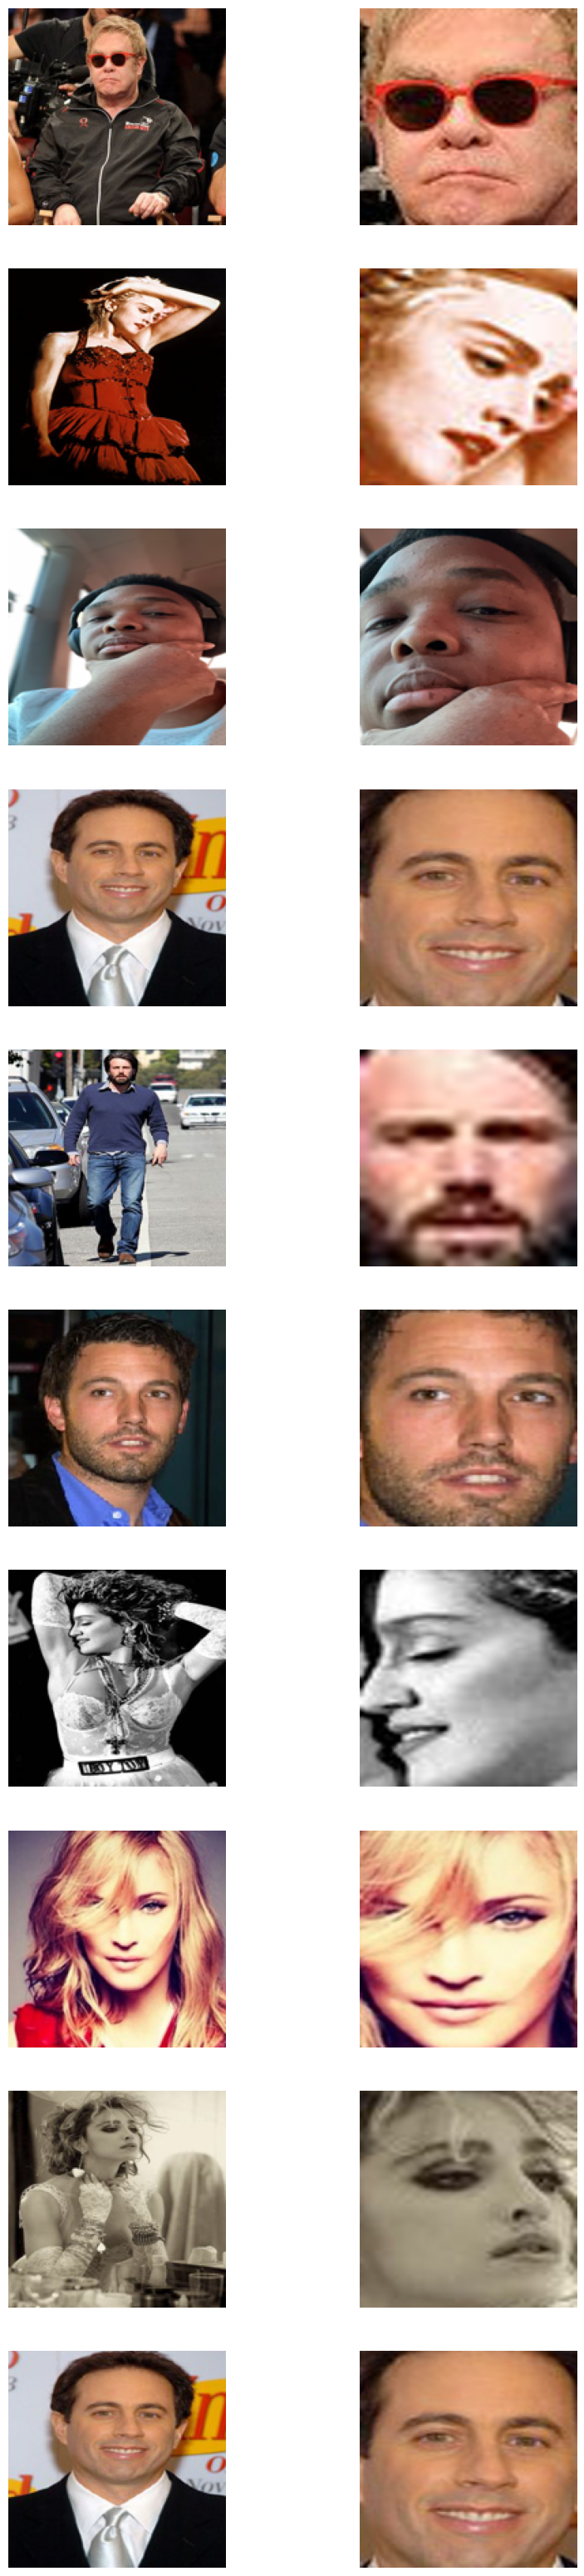

In [53]:
from random import choices
amount = 10
images_test = [x for x in glob(os.sep.join(['dataset/train', '**']), recursive=True) if x.split(".")[-1].lower() in ("jpg", "png", "jpeg")]
images_test = choices(images_test, k=amount)
fig, axs = plt.subplots(amount, 2, figsize=(10,40))
for i, filename in enumerate(images_test):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = image.resize((160, 160))
    face_array = np.asarray(image)
    axs[i, 0].axis('off')
    axs[i, 0].imshow(face_array)
    axs[i, 1].axis('off')
    axs[i, 1].imshow(extract_face(filename))


In [54]:
np.savez_compressed('dataset/5-celebrity-and-me-faces-dataset.npz', trainX, trainy, testX, testy)

In [6]:
# load a dataset that contains one subdir for each class that in turn contains images
#def load_dataset(dataset_dir_name="dataset"):
#    X, y = [], []
#    # enumerate folders, on per class
#    
#    for subdir in listdir(directory):
#        # path
#        path = directory + subdir + '/'
#        # skip any files that might be in the dir
#        if not isdir(path):
#            continue
#        # load all faces in the subdirectory
#        faces = load_faces(path)
#        # create labels
#        labels = [subdir for _ in range(len(faces))]
#        # summarize progress
#        print('>loaded %d examples for class: %s' % (len(faces), subdir))
#        # store
#        y.extend(labels)
#    return np.asarray(X), np.asarray(y)

In [23]:
## load train dataset
#trainX, trainy = load_dataset('dataset/train/')
#print(trainX.shape, trainy.shape)
## load test dataset
#testX, testy = load_dataset('dataset/val/')
#print(testX.shape, testy.shape)
## save arrays to one file in compressed format
#np.savez_compressed('dataset/5-celebrity-and-me-faces-dataset.npz', trainX, trainy, testX, testy)

## block 2: processing faces

### Load model and data

In [7]:
# load the face dataset
data = np.load('dataset/5-celebrity-and-me-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = np.expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
np.savez_compressed('dataset/5-celebrity-and-me-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (112, 160, 160, 3) (112,) (32, 160, 160, 3) (32,)


ValueError: bad marshal data (unknown type code)

## block 3: fit model and predict

In [2]:
# load dataset
data = np.load('dataset/5-celebrity-and-me-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print(f'Dataset: train={trainX.shape[0]}, test={testX.shape[0]}')
# normalize input vectors


# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print(f'Accuracy: train={score_train*100:.2f}%, test={score_test*100:.2f}%')

Dataset: train=115, test=31
Accuracy: train=100.00%, test=100.00%


In [3]:
# load faces
data = np.load('dataset/5-celebrity-and-me-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = np.load('dataset/5-celebrity-and-me-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

Predicted: daniel_diaz (84.237)
Expected: daniel_diaz


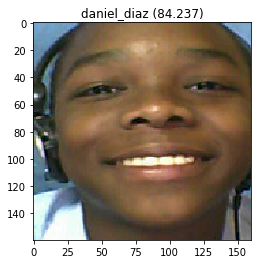

In [19]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

# Final tests

In [86]:
import numpy as np
import matplotlib.pyplot as plt
test = np.load('image.npz')
test2 = np.load('image2.npz')

In [93]:
test_proba = np.array([[1.23042387e-14, 9.99999790e-01, 1.00000039e-07, 2.56365174e-08,
        5.05535792e-08, 3.33344303e-08]])

In [ ]:
array([[1.82443460e-14, 9.99999796e-01, 1.00000039e-07, 2.23627073e-08,
        5.00275360e-08, 3.19790222e-08]])

In [98]:
test_proba[0][test_proba.argmax()]

0.99999979

In [95]:
test_proba[0][0]

1.23042387e-14

In [90]:
test.shape

AttributeError: 'NpzFile' object has no attribute 'shape'

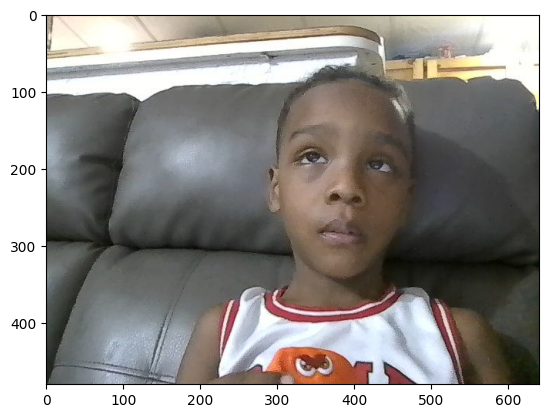

In [91]:
plt.imshow(test['arr_0'])

In [36]:
import json
import cv2
import requests

In [29]:
detector = MTCNN()
results = detector.detect_faces(test2)

1/1 [==============================] - 0s 64ms/step


In [33]:

square_size = int(results[0]['box'][2] * 0.35)

left_side_eye = results[0]['keypoints']['left_eye'][1] - square_size // 2
right_side_eye = results[0]['keypoints']['left_eye'][1] - square_size // 2 + square_size

top_side_eye = results[0]['keypoints']['left_eye'][0] - square_size // 2
bottom_side_eye = results[0]['keypoints']['left_eye'][0] - square_size // 2 + square_size

left_eye = test2[left_side_eye:right_side_eye, top_side_eye:bottom_side_eye]

rescaled_image = cv2.resize(left_eye, (26, 34), interpolation=cv2.INTER_LINEAR)

gray_image = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2GRAY)


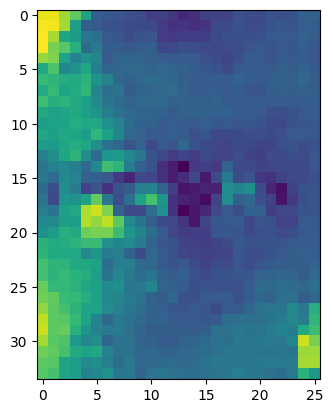

In [74]:
plt.imshow(gray_image)

In [75]:
data = json.dumps({"signature_name": "serving_default", "instances":np.expand_dims(gray_image, axis=-1).tolist()})
response = requests.post("http://localhost:8501/v1/models/blink_detector_model:predict", data=data)
response

<Response [200]>